### ACTIVE LEARNING

1. What is AL?
    - Active learning (AL) attempts to maximize a models performance gain while annotating the fewest samples possible. 
    There are situations in which unlabeled data is abundant but manual labeling is expensive. In such a scenario, 
    learning algorithms can actively query the oracle for labels. This type of iterative supervised learning is called active learning.
    - "Active learning involves identifying the data points that are most likely to challenge the model and using them to improve its performance before errors occur."

2. Most common method?
    - The most mature package for Active Learning in the context of Deep Learning is BAAL.

3. Our strategies
    - Active learning - strategy (Uncertainty sampling using SoftMax entropy) and (optionally) Bayesian method using MC drop out)

4. How many data points to label in each iteration?
    - In most practical applications (especially deep learning), people use batch mode active learning:
    - Select a batch of K most uncertain samples, label them, retrain, and repeat.

5. Difference Between Stream-Based and Pool-Based Sampling
    - In active learning, stream-based selective sampling and pool-based sampling differ primarily in how unlabeled data is evaluated for querying:
        - Stream-Based Selective Sampling evaluates each incoming data point individually and decides immediately whether to query its label, 
        without considering the rest of the data. This approach is suited for scenarios with continuous data streams or limited storage.
        - Pool-Based Sampling, in contrast, assumes access to a large pool of unlabeled data. The model evaluates and ranks all samples 
        in the pool based on a query strategy (e.g., uncertainty), and selects the most informative samples for labeling. 
        This method is widely used in batch-mode active learning due to its efficiency and flexibility.

6. Problems with uncertainity based active learning
    - Uncertainty-Based Querying in Active Learning
        Active learning often selects unlabeled samples that the model is most uncertain about. 
        A common way to measure this uncertainty is using the softmax output from the model — for example, low maximum probability or high entropy.
    - Softmax in Deep Learning: Overconfidence
        In classification tasks, deep learning models use a softmax layer to convert raw output scores (logits) into a probability distribution over classes.
        However:
            - These softmax probabilities can be misleadingly confident, even when the model is wrong.
            - This happens because DL models tend to overfit or learn overconfident mappings, especially when trained on limited or biased data.
            - So, the softmax response (SR) — the highest predicted probability — might not truly reflect the model's uncertainty.
    - If the model thinks its confident but is actually wrong, it wont select that sample during uncertainty sampling.
    - This reduces the effectiveness of active learning, sometimes even making it worse than random sampling (which selects without any bias).
    

----

### IMPORTANT LINKS

* https://medium.com/@george.pearse/active-learning-for-deep-learning-312a1657c4c1
* https://github.com/baal-org/baal?source=post_page-----312a1657c4c1---------------------------------------
* https://github.com/baal-org/baal/blob/master/experiments/vgg_mcdropout_cifar10.py
* https://github.com/rmunro/pytorch_active_learning/blob/master/uncertainty_sampling.py
* https://younsess-elbrag.medium.com/active-learning-approaches-strategies-deep-learning-integration-and-essential-tools-6ff2bdfe5cb


----------

### ABOUT DATA

1. MIC window 5495 has only 3199 samples for pneumatic screw driver
2. 

---


### DOWNSAMPLING

Fill_value controls what happens when the target_time includes timestamps outside the original_time range

- fill_value	                
    - None (default) : Raises an error if you go outside original_time (⚠️ risky for real-world sensor data)
    - 'extrapolate'	 : Linear extrapolation (safe for smooth signals)
    - np.nan	     : Pads out-of-range values with NaNs (good for missing data detection)
    - Custom constant (0) : Pads with 0s (can be useful if you treat silence/baseline as 0)

#### ✅ When to use extrapolate?

- When you trust your data is smooth enough for linear extrapolation (common with sensor streams).
- When you want continuous data and can’t afford missing values or alignment failures.

- Use interp1d to synchronize sensor data
- Use resample to standardize the shape for ML

SO BOTH ARE REQUIRED.

#### ✅ Recommendation

Use interp1d if:

- Your sensors have different sampling frequencies.

- You care about time alignment.

- You want higher precision.

Use resample if:

- Your goal is feature extraction or classification, and exact timing isn’t critical.

- All sensors are roughly synchronized.

- You want simplicity and speed.

---

### ELECTRIC SCREWDRIVER LABEL DESCRIPTIONS:

| Label ID | Class Name               | Description |
|----------|--------------------------|-------------|
| **2**    | **tightening**           | The screwdriver is actively engaging and tightening a screw. This involves **clockwise (CW) motor activity under load**, typically with a noticeable torque build-up phase, followed by torque saturation or cutoff. This is a key target class in torque-related classification tasks. |
| **3**    | **untightening**         | The screwdriver is loosening a previously tightened screw. This involves **counterclockwise (CCW) motor activity under load**, characterized by a resistance phase during the initial loosening and a sharp drop once the screw is disengaged. |
| **4**    | **motor_activity_cw**    | The screwdriver motor is spinning **clockwise**, but **no significant resistance is detected** (e.g., free spinning, air runs, or test runs). This class helps differentiate between intentional screw tightening and idle motor activity. |
| **5**    | **motor_activity_ccw**   | The motor spins **counterclockwise** without engaging a screw. This may occur during tool retraction, reversing, or during a misaligned start. Unlike untightening, there is minimal torque or load buildup. |
| **6**    | **manual_motor_rotation**| The tool is being **rotated manually** by the user (without motor assistance). The signal patterns show low and irregular motion patterns, lacking the high-frequency signals typical of powered motor runs. |
| **7**    | **shaking**              | The screwdriver is being **shaken or moved erratically**, possibly while searching for a screw or repositioning. This class shows noisy, non-periodic accelerometer/gyroscope patterns, often mistaken for active use without proper filtering. |
| **8**    | **undefined**            | This label is assigned to **ambiguous, noisy, or transitional data windows** that cannot be confidently classified into other categories. It may include sensor glitches, mixed states, or unannotated events. This class can be excluded or treated with care during training. |
| **14**   | **tightening_double**    | A compound tightening operation where the screwdriver applies torque in **two phases** (e.g., pre-tightening followed by final tightening). This may occur in multi-stage tightening strategies and can resemble `tightening` but with a distinguishable dual-peak in torque or current. |


Original y (10 samples): [ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]
Resampled y (5 samples): [ 0.18849073  0.92446126  0.38285775 -0.90515109 -0.59065865]


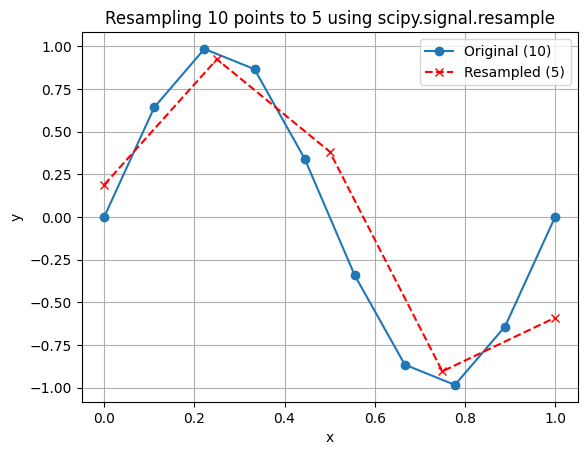

In [1]:
import numpy as np
from scipy.signal import resample
import matplotlib.pyplot as plt

# Original data: 10 points
x_original = np.linspace(0, 1, 10)
y_original = np.sin(2 * np.pi * x_original)

# Resample to 5 points
y_resampled = resample(y_original, 5)
x_resampled = np.linspace(0, 1, 5)

# Print original and resampled data
print("Original y (10 samples):", y_original)
print("Resampled y (5 samples):", y_resampled)

# Plot
plt.plot(x_original, y_original, 'o-', label='Original (10)')
plt.plot(x_resampled, y_resampled, 'x--', label='Resampled (5)', color='red')
plt.legend()
plt.title("Resampling 10 points to 5 using scipy.signal.resample")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


Original y (10): [ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]
Interpolated y (5): [ 0.00000000e+00  9.55112166e-01  1.11022302e-16 -9.55112166e-01
 -2.44929360e-16]


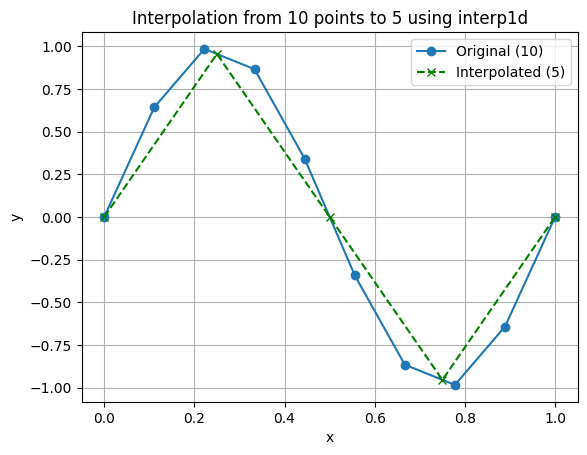

In [2]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

# Original 10 data points
x_original = np.linspace(0, 1, 10)
y_original = np.sin(2 * np.pi * x_original)

# Define new x-points for interpolation (want only 5 points)
x_new = np.linspace(0, 1, 5)

# Create interpolator function
f_interp = interp1d(x_original, y_original, kind='linear')

# Interpolate to get y-values at 5 new x-locations
y_interp = f_interp(x_new)

# Print results
print("Original y (10):", y_original)
print("Interpolated y (5):", y_interp)

# Plot comparison
plt.plot(x_original, y_original, 'o-', label='Original (10)')
plt.plot(x_new, y_interp, 'x--', color='green', label='Interpolated (5)')
plt.legend()
plt.title("Interpolation from 10 points to 5 using interp1d")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()


In [5]:
import numpy as np

# Example data simulating Xt (each sample has a different length)
Xt = [np.array([1, 2, 3]),
      np.array([4, 5]),     # <-- shorter length
      np.array([6, 7]),
      np.array([1, 2, 3])]

# Indices to remove
indices_to_remove = {0,2}

# This will cause a ValueError due to inhomogeneous shapes
def remove_windows_by_indices_broken(Xt,indices_to_remove):
    mask = [i not in indices_to_remove for i in range(len(Xt))]
    Xt  = [Xt[i]  for i in range(len(Xt))  if mask[i]]
    return Xt

# Run it
Xt_f = remove_windows_by_indices_broken(Xt, indices_to_remove)
print(Xt_f)


[array([4, 5]), array([1, 2, 3])]
